# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Anna Maulidita Widy Anggraena
- **Email:** mauliditaanna@gmail.com
- **ID Dicoding:** annamwa

## Menentukan Pertanyaan Bisnis

1. Apa hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?
2. Bagaimana distribusi jumlah penyewaan sepeda (cnt) berdasarkan hari dalam seminggu (weekday)?


## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
sns.set(style='dark')

## Data Wrangling

### Gathering Data

In [2]:
day = pd.read_csv('day.csv')
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
hour = pd.read_csv('hour.csv')
hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday

In [5]:
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Terdapat kesalahan tipe data untuk kolom dteday


In [6]:
day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


**Insight:**
- Tidak Terdapat Missing Values


In [7]:
hour.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


**Insight:**
- Tidak Terdapat Missing Values


In [8]:
print("Jumlah duplikasi: ", day.duplicated().sum())
print("Jumlah duplikasi: ", hour.duplicated().sum())

Jumlah duplikasi:  0
Jumlah duplikasi:  0


**Insight:**
- Tidak Terdapat Data Duplikat


In [9]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [10]:
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [11]:
datetime_columns = ["dteday"]

for calumn in datetime_columns:
    day[calumn] = pd.to_datetime(day[calumn])
    hour[calumn] = pd.to_datetime(hour[calumn])

day.info()
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Memperbaiki Tipe Data dteday dari object menjadi datetime


## Exploratory Data Analysis (EDA)

### Explore
1. Menggunakan day.describe(include="all"), eksplorasi data dilakukan untuk mendapatkan statistik deskriptif seperti mean, median, max, min, dan distribusi data dari seluruh kolom, termasuk kolom kategori dan numerik.
2.  Dengan groupby('season'), dilakukan eksplorasi total jumlah cnt (jumlah total) sepeda yang dipakai berdasarkan musim (season), untuk melihat bagaimana penggunaan sepeda bervariasi di setiap musim.
3. Menggunakan groupby('mnth'), jumlah sepeda yang digunakan dieksplorasi berdasarkan bulan (mnth), untuk memahami variasi penggunaan sepeda di sepanjang tahun.
4. groupby('weekday') mengeksplorasi penggunaan sepeda berdasarkan hari dalam minggu (weekday), mencari pola penggunaan berdasarkan hari kerja atau akhir pekan.
5. Dengan groupby('weathersit'), dieksplorasi bagaimana kondisi cuaca (weathersit) mempengaruhi jumlah sepeda yang dipakai.
6. groupby('workingday') mengeksplorasi pengaruh hari kerja (workingday) terhadap jumlah sepeda yang dipakai.
7. groupby('holiday') mengeksplorasi apakah ada perbedaan signifikan dalam penggunaan sepeda pada hari libur (holiday).
8. groupby('yr') mengeksplorasi tren penggunaan sepeda berdasarkan tahun (yr), untuk melihat apakah terjadi perubahan tren antar tahun.

In [12]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [13]:
day.groupby(by='season').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


season : season (1:springer, 2:summer, 3:fall, 4:winter)

Ternyata, pada jumlah penyewaan sepeda lebih banyak pada musim gugur (fall), yang kedua terbanyak adalah musim panas (Summer), yang ketiga adalah musim dingin (winter) dan yang keempat adalah musim semi (springer)

In [14]:
day.groupby(by='mnth').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
mnth,
8,351194
6,346342
9,345991
7,344948
5,331686
10,322352
4,269094
11,254831
3,228920


Untuk penyewaan sepeda perbulan, paling tinggi yaitu bulan Agustus dan paling rendah yaitu bulan januari

In [15]:
day.groupby(by='weekday').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


Untuk penyewaan sepeda perhari, lebih tinggi pada hari jumat

In [16]:
day.groupby(by='weathersit').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
weathersit,
1,2257952
2,996858
3,37869


1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [17]:
day.groupby(by='workingday').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
workingday,
1,2292410
0,1000269


if day is neither weekend nor holiday is 1, otherwise is 0

In [18]:
day.groupby(by='holiday').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
holiday,
0,3214244
1,78435


In [19]:
day.groupby(by='yr').agg({
    'cnt': 'sum'
}).sort_values(by='cnt', ascending=False)

,cnt
yr,
1,2049576
0,1243103


0 = 2011
1 = 2012

jumlah penyewaaan sepeda tahun 2012 lebih ramai daripada satu tahun sebelumnya (2011)

**Pertanyaan bisnis:**
1. Apa hubungan antara suhu (temp) dan jumlah penyewaan sepeda (cnt)?
2. Bagaimana distribusi jumlah penyewaan sepeda (cnt) berdasarkan hari dalam seminggu (weekday)?

## Visualization & Explanatory Analysis

### Pertanyaan 1:

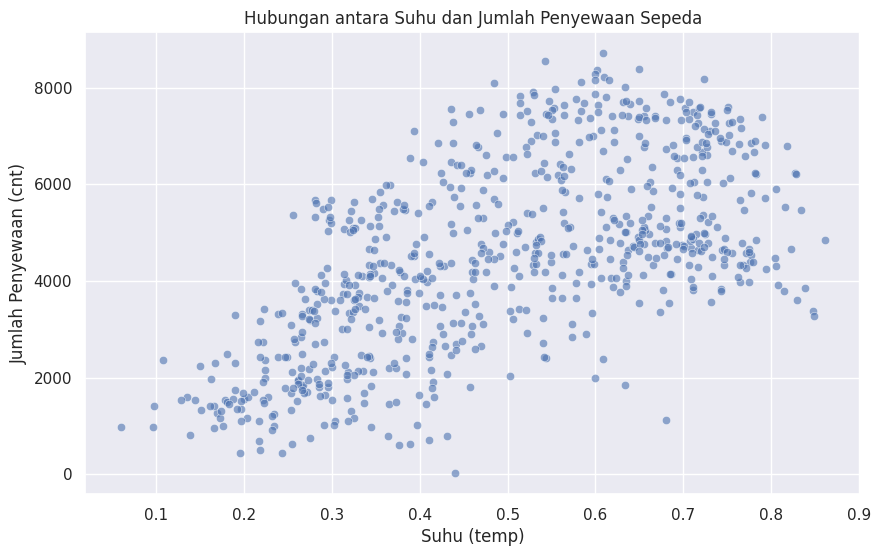

Visualisasi hubungan antara suhu dan jumlah penyewaan sepeda telah dibuat.


In [20]:
# Menghitung total penyewaan sepeda berdasarkan suhu
# Menggunakan df_day untuk analisis ini
plt.figure(figsize=(10, 6))
sns.scatterplot(data=day, x='temp', y='cnt', alpha=0.6)
plt.title('Hubungan antara Suhu dan Jumlah Penyewaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.grid()
plt.savefig('temperature_vs_rentals.png')
plt.show()
print('Visualisasi hubungan antara suhu dan jumlah penyewaan sepeda telah dibuat.')

### Pertanyaan 2:

<ipython-input-21-c6d73192e4b2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=weekday_counts, x='weekday', y='cnt', palette='coolwarm')


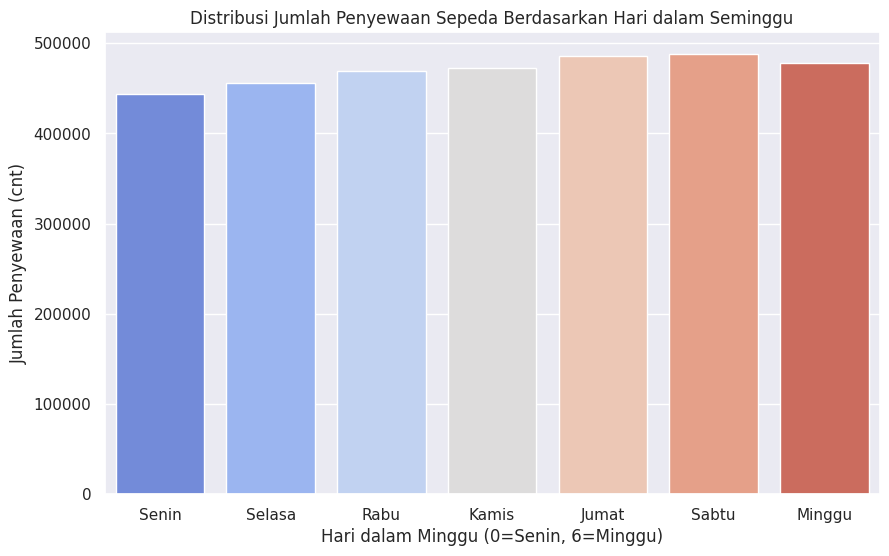

Visualisasi distribusi jumlah penyewaan sepeda berdasarkan hari dalam seminggu telah dibuat.


In [21]:
# Menghitung total penyewaan sepeda berdasarkan hari dalam seminggu
# Menggunakan df_day untuk analisis ini
weekday_counts = day.groupby('weekday')['cnt'].sum().reset_index()

# Membuat visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_counts, x='weekday', y='cnt', palette='coolwarm')
plt.title('Distribusi Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari dalam Minggu (0=Senin, 6=Minggu)')
plt.ylabel('Jumlah Penyewaan (cnt)')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.grid(axis='y')
plt.savefig('rentals_by_weekday.png')
plt.show()
print('Visualisasi distribusi jumlah penyewaan sepeda berdasarkan hari dalam seminggu telah dibuat.')

**Insight:**
- Penyewaan paling tinggi ditunjukkan pada hari jumat sabtu dan minggu dibandingkan hari kerja.

## Pembuatan Dashboard


In [23]:
all_df = pd.read_csv('all_data.csv')

## Conclusion

Kesimpulan Pertanyaan 1 = Suhu memiliki pengaruh terhadap jumlah penyewaan sepeda, dapat dilihat dari scatter plot, semakin hangat suhunya maka semakin banyak jumlah penyewaannya.

Kesimpulan Pertanyaan 2 = Diagram batang menggambarkan distribusi jumlah sewa sepeda perhari dalam seminggu. Didapati bahwa hari jumat, sabtu dan minggu memiliki jumlah penyewaan paling banyak dibanding hari lainnya.

Dari analisis tsb, dpt dilihat bahwa suhu dan hari (waktu) memiliki pengaruh yang signifikan terhadap penyewaan sepeda. Data ini dapat digunakan untuk merencanakan strategi pemasaran dan pengelolaan jumlah sepeda.
